In [1]:
# !pip install datapackage

#dependencies (may need to run pip install above for 'datapackage')
import datapackage
import pandas as pd

data_url = 'https://datahub.io/core/sea-level-rise/datapackage.json'

#load Data Package into storage
package = datapackage.Package(data_url)

In [2]:
#load only tabular data
all_data = []
resources = package.resources

for resource in resources:
    if resource.tabular:
        data = pd.read_csv(resource.descriptor['path'])
        print (data)
        all_data.append(data)

           Time  GMSL
0    1993-01-15  -1.6
1    1993-02-15  -3.4
2    1993-03-15   5.5
3    1993-04-15   0.1
4    1993-05-15   5.3
..          ...   ...
261  2014-10-15  71.7
262  2014-11-15  69.0
263  2014-12-15  76.0
264  2015-01-15  74.5
265  2015-02-15  79.5

[266 rows x 2 columns]
          Time  GMSL
0   1993-03-15   1.4
1   1994-03-15   2.7
2   1995-03-15   5.7
3   1996-03-15  11.4
4   1997-03-15  16.1
5   1998-03-15  21.9
6   1999-03-15  22.1
7   2000-03-15  25.0
8   2001-03-15  29.6
9   2002-03-15  33.3
10  2003-03-15  35.4
11  2004-03-15  37.6
12  2005-03-15  41.4
13  2006-03-15  42.9
14  2007-03-15  43.2
15  2008-03-15  48.6
16  2009-03-15  53.5
17  2010-03-15  54.9
18  2011-03-15  54.6
19  2012-03-15  65.4
20  2013-03-15  67.9
21  2014-03-15  71.3
            Time   GMSL  GMSL uncertainty
0     1880-01-15 -183.0              24.2
1     1880-02-15 -171.1              24.2
2     1880-03-15 -164.3              24.2
3     1880-04-15 -158.2              24.2
4     1880-05-15 -1

In [3]:
#clean df; keep columns of interest, drop rows w/o data
sea_df = all_data[4][['Year', 'CSIRO Adjusted Sea Level', 'Lower Error Bound', 'Upper Error Bound']]
sea_df = sea_df.dropna (how = 'any')

sea_df

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound
0,1880-03-15,0.000000,-0.952756,0.952756
1,1881-03-15,0.220472,-0.732283,1.173228
2,1882-03-15,-0.440945,-1.346457,0.464567
3,1883-03-15,-0.232283,-1.129921,0.665354
4,1884-03-15,0.590551,-0.283465,1.464567
...,...,...,...,...
129,2009-03-15,8.586614,8.311024,8.862205
130,2010-03-15,8.901575,8.618110,9.185039
131,2011-03-15,8.964567,8.661417,9.267717
132,2012-03-15,9.326772,8.992126,9.661417


In [4]:
#import datetime
import datetime as dt

#convert date to year integer for ML
sea_df['year'] = ''

for index, row in sea_df.iterrows():
    p_date = dt.datetime.strptime (row['Year'], '%Y-%m-%d')
    f_date = int(dt.datetime.strftime (p_date, '%Y'))
    sea_df.loc [index, 'year'] = f_date

sea_df

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,year
0,1880-03-15,0.000000,-0.952756,0.952756,1880
1,1881-03-15,0.220472,-0.732283,1.173228,1881
2,1882-03-15,-0.440945,-1.346457,0.464567,1882
3,1883-03-15,-0.232283,-1.129921,0.665354,1883
4,1884-03-15,0.590551,-0.283465,1.464567,1884
...,...,...,...,...,...
129,2009-03-15,8.586614,8.311024,8.862205,2009
130,2010-03-15,8.901575,8.618110,9.185039,2010
131,2011-03-15,8.964567,8.661417,9.267717,2011
132,2012-03-15,9.326772,8.992126,9.661417,2012


In [41]:
#begin pre-processing; define X & y
X = sea_df['year'].values.reshape (-1, 1)
y = sea_df['CSIRO Adjusted Sea Level'].values.reshape (-1, 1)

print (X.shape, y.shape)

(134, 1) (134, 1)


In [48]:
#imports
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler

#split training/testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

# #fit scaler to data
# X_scaler = StandardScaler().fit (X_train)
# y_scaler = StandardScaler().fit (y_train)

# #transform train/test data w/ scalers
# X_train_scaled = X_scaler.transform (X_train)
# X_test_scaled = X_scaler.transform (X_test)
# y_train_scaled = y_scaler.transform (y_train)
# y_test_scaled = y_scaler.transform (y_test)

In [56]:
#create linear regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
#score model
train_score = model.score (X_train, y_train)
test_score = model.score (X_test, y_test)

print (train_score, test_score)

0.9702852437583512 0.9679131610147005


In [58]:
print (f'm = {model.coef_}, b = {model.intercept_}')

m = [[0.06274343]], b = [-118.47342009]


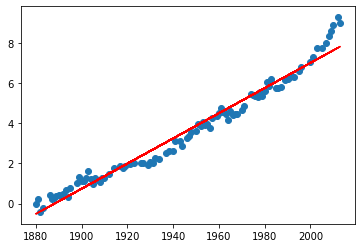

In [61]:
import matplotlib.pyplot as plt

plt.scatter (X_train, y_train)
plt.plot (X_train, (X_train * model.coef_[0][0] + model.intercept_[0]), "r-")

In [60]:
#input list of years to predict future rise in sea level
X_predict = pd.Series([2030, 2040, 2050, 2100, 2200]).values.reshape (-1, 1)

predictions = model.predict (X_predict)
predictions

array([[ 8.89574491],
       [ 9.52317922],
       [10.15061353],
       [13.28778509],
       [19.56212819]])